In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_countries = pd.read_csv(r'C:\Users\ITN1\OneDrive - UPV\Escritorio\Data Science\Learning Python\Datasets & Analysis\datasets\metro\metro_countries_total.csv')
df_cities = pd.read_csv(r'C:\Users\ITN1\OneDrive - UPV\Escritorio\Data Science\Learning Python\Datasets & Analysis\datasets\metro\metro_countries_cities.csv')
df_inprogress = pd.read_csv(r'C:\Users\ITN1\OneDrive - UPV\Escritorio\Data Science\Learning Python\Datasets & Analysis\datasets\metro\metro_countries_in_progress.csv')

In [3]:
df_countries.head() 

,country,systems,length,lines,stations,annual_ridership_mill,inauguration,region
0,China,43,8549.62,249,5375,2.10,1969,asia
1,United States,15,1344.70,86,1228,0.75,1892,north_america
2,South Korea,8,871.20,34,728,3.87,1974,asia
3,Japan,13,791.20,45,747,8.19,1927,asia
4,India,15,731.75,31,585,3.70,1984,asia


In [4]:
df_cities.head()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
0,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.30,africa
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00,latin_america
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75,asia
3,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.90,australia
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.80,europe


In [5]:
df_inprogress.head()

,city,country,name,start_construction,planned_opening,region
0,Dhaka,Bangladesh,Dhaka Metro,2016,2022,asia
1,Guilin,China,Guilin Metro,2017,2025,asia
2,Jinhua,China,Jinhua Rail Transit,2017,2022,asia
3,Liuzhou,China,Liuzhou Metro,2016,2024,asia
4,Nantong,China,Nantong Metro,2017,2022,asia


### Countries with highest number of Stations:

In [6]:
#The dataframe gives us the aggregate for each country
len(np.unique(df_countries['country'])) == len(df_countries)

True

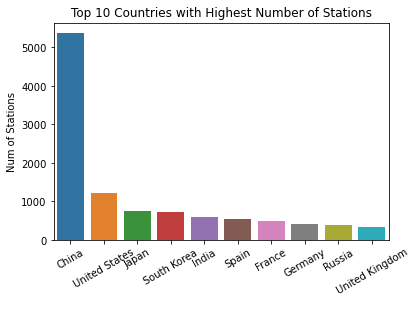

In [7]:
top_stations = df_countries[['country', 'stations', 'annual_ridership_mill']].sort_values('stations', ascending=False).head(10)
fig1 = sns.barplot(x = 'country', 
           y = 'stations',
           data = top_stations)

fig1.set(xlabel = " ",
        ylabel = "Num of Stations")
fig1.set_xticklabels(fig1.get_xticklabels(),rotation = 30)
fig1.set_title("Top 10 Countries with Highest Number of Stations")
fig1

### Countries with Highest Number of Lines

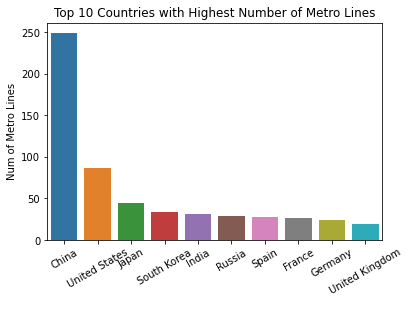

In [8]:
top_lines = df_countries[['country', 'lines']].sort_values('lines', ascending= False).head(10)
fig2 = sns.barplot(x = 'country', 
                  y = 'lines', 
                  data = top_lines)
fig2.set(xlabel = " ",
        ylabel = "Num of Metro Lines")
fig2.set_xticklabels(fig2.get_xticklabels(),rotation = 30)
fig2.set_title("Top 10 Countries with Highest Number of Metro Lines")
fig2

Which Countries are in the top 10 number of metro stations but not top 10 highest number of metro lines?

In [9]:
# Identify what values are in Fig1 and not in Fig2
key_diff = set(top_lines.country).difference(top_stations.country)
key_diff

key_diff = set(top_stations.country).difference(top_lines.country)
key_diff

set()

We can see that all countries in the first graph are in the second graph & vice versa. 

### Plot Regions with Highest to Lowest Number of Annual Ridership

In [10]:
regions_total = df_countries.groupby('region').sum()[['length', 'lines', 'stations','annual_ridership_mill']].reset_index()
regions_total

,region,length,lines,stations,annual_ridership_mill
0,africa,107.90,4,93,2.40
1,asia,13311.76,477,9239,53.11
2,australia,36.00,1,13,0.35
3,europe,2971.70,185,3122,68.67
4,latin_america,1009.20,62,931,26.16
5,north_america,1571.80,97,1424,2.53


Although I have reason to suspect that the data for Africa & Australia are incomplete, for the sake of learning I will continue with this data and learn how to plot multiple graphs on 1.

[Text(0, 0.5, 'Annual Ridership (in millions)'),
 Text(0.5, 0, ' '),
 Text(0.5, 1.0, 'Annual Ridership per Region')]

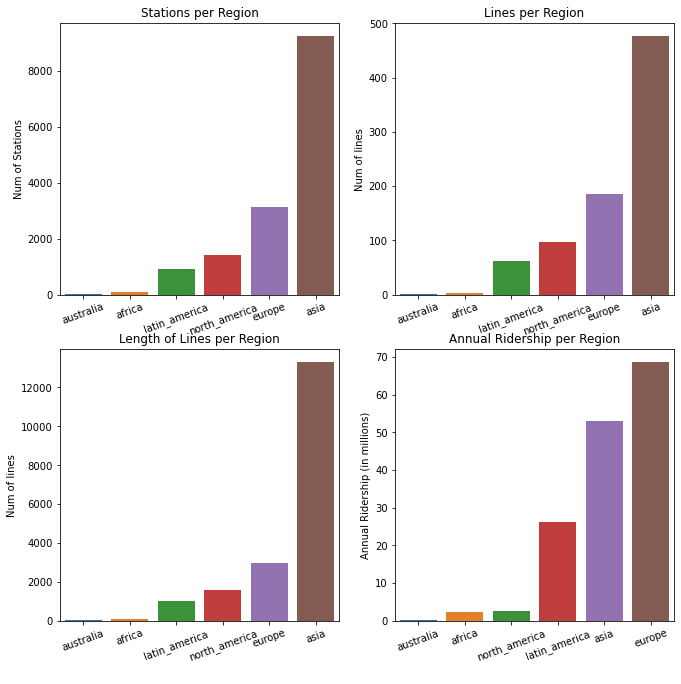

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11,11))

fig1 = sns.barplot(x = 'region', 
           y = 'stations', 
           data = regions_total.sort_values('stations'), 
                  ax = ax[0,0])
fig1.set_xticklabels(fig1.get_xticklabels(),rotation = 20)
fig1.set(xlabel = " ",
        ylabel = "Num of Stations", 
        title = "Stations per Region")

fig2 = sns.barplot(
    x = 'region', 
    y = 'lines', 
    data = regions_total.sort_values('lines'),
    ax = ax[0,1])
fig2.set_xticklabels(fig2.get_xticklabels(),rotation = 20)
fig2.set(xlabel = " ",
        ylabel = "Num of lines", 
        title = "Lines per Region")


fig3 = sns.barplot(
    x = 'region', 
    y = 'length', 
    data = regions_total.sort_values('length'),
    ax = ax[1,0])
fig3.set_xticklabels(fig3.get_xticklabels(),rotation = 20)
fig3.set(xlabel = " ",
        ylabel = "Num of lines", 
        title = "Length of Lines per Region")

fig4 = sns.barplot(
    x = 'region', 
    y = 'annual_ridership_mill', 
    data = regions_total.sort_values('annual_ridership_mill'),
    ax = ax[1,1])
fig4.set_xticklabels(fig4.get_xticklabels(),rotation = 20)
fig4.set(xlabel = " ",
        ylabel = "Annual Ridership (in millions)", 
        title = "Annual Ridership per Region")

#### Cities with Metros

In [12]:
len(df_cities)

198

In [13]:
#Number of Cities per Country
df_cities.groupby('country').count()['city'].reset_index().sort_values('city', ascending = False)

,country,city
12,China,43
55,United States,15
24,India,15
28,Japan,13
45,South Korea,8
27,Italy,7
8,Brazil,7
43,Russia,7
19,France,6
51,Turkey,5


In [14]:
#More Thourough Analysis of China
df_cities[df_cities['country'] == 'China']

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
20,Beijing,China,Beijing Subway,1971,2021,366,762,2292.650,asia
21,Changchun,China,Changchun Rail Transit,2002,2021,63,726,154.370,asia
22,Changsha,China,Changsha Metro,2014,2020,100,1425,385.760,asia
23,Changzhou,China,Changzhou Metro,2019,2021,43,5421,22.820,asia
24,Chengdu,China,Chengdu Metro,2010,2020,285,5192,1800.000,asia
25,Chongqing,China,Chongqing Rail Transit,2005,2022,210,4025,839.750,asia
26,Dalian,China,Dalian Metro,2003,2021,80,20103,125.220,asia
27,Dongguan,China,Dongguan Rail Transit,2016,2016,15,378,35.060,asia
28,Foshan,China,Foshan Metro,2010,2021,41,719,0.000,asia
29,Fuzhou,China,Fuzhou Metro,2016,2020,46,5972,94.750,asia


What are the top 5 cities with the highest number of Stations & the bottom 5 cities with the lowest number of stations?

In [15]:
highest_lowest_cities = pd.concat(
    [df_cities[df_cities['country'] == 'China'][['city', 'stations']].groupby('city').sum().reset_index().sort_values(
    'stations', ascending = False).head(10),
    df_cities[df_cities['country'] == 'China'][['city', 'stations']].groupby('city').sum().reset_index().sort_values(
    'stations', ascending = True).head(10)],
    axis = 0
)

highest_lowest_cities

,city,stations
26,Shanghai,396
0,Beijing,366
10,Guangzhou,290
29,Shenzhen,288
4,Chengdu,285
35,Wuhan,247
5,Chongqing,210
12,Hangzhou,207
22,Nanjing,175
38,Xi'an,164


What are the most congested cities in terms of ridership/stations & ridership/km?

In [16]:
df_china = df_cities[df_cities['country'] == 'China']

 
#annual_ridership_per_station =  df_china['annual_ridership_mill']/df_china['stations']
df_china.insert(3, "annual_ridership_per_station", df_china['annual_ridership_mill']/df_china['stations'])
df_china.insert(4, "annual_ridership_per_km", df_china['annual_ridership_mill']/df_china['length_km'])

df_china[['city', 'annual_ridership_per_station']].sort_values('annual_ridership_per_station', ascending = False).head(n = 10)

,city,annual_ridership_per_station
36,Hong Kong,11.915464
30,Guangzhou,8.329655
46,Shanghai,7.158308
24,Chengdu,6.315789
20,Beijing,6.264071
49,Shenzhen,5.648368
42,Nanjing,4.579086
60,Xi'an,4.457561
25,Chongqing,3.998810
22,Changsha,3.857600


In [17]:
df_china[['city', 'annual_ridership_per_km']].sort_values('annual_ridership_per_km', ascending = False).head(n = 10)

,city,annual_ridership_per_km
49,Shenzhen,3.882411
46,Shanghai,3.530125
20,Beijing,3.008727
48,Shenyang,2.726552
42,Nanjing,1.876674
32,Hangzhou,1.452394
56,Wuhan,1.443747
53,Tianjin,1.278302
33,Harbin,0.649747
36,Hong Kong,0.565460


In [52]:
#Cities with the highest number of stations
#Cities with the highest annual ridership
#Cities with the longest metro lines in km 

top_stations_cities = df_cities[['city','stations']].groupby('city').sum().sort_values('stations', ascending = False).head(n = 20).reset_index()
top_stations_cities['rank'] = top_stations_cities['stations'].rank(ascending = False)
top_stations_cities.columns = top_stations_cities.columns.str.replace('rank', 'rank_stations')

top_ridership_cities = df_cities[['city','annual_ridership_mill']].groupby('city').sum().sort_values('annual_ridership_mill', ascending = False).head(n = 20).reset_index()
top_ridership_cities['rank'] = top_ridership_cities['annual_ridership_mill'].rank(ascending = False)
top_ridership_cities.columns = top_ridership_cities.columns.str.replace('rank', 'rank_ridership')

top_length_cities = df_cities[['city','length_km']].groupby('city').sum().sort_values('length_km', ascending = False).head(n = 20).reset_index()
top_length_cities['rank'] = top_length_cities['length_km'].rank(ascending = False)
top_length_cities.columns = top_length_cities.columns.str.replace('rank', 'rank_length')

from functools import reduce

data_frames = [top_stations_cities, top_ridership_cities, top_length_cities]
df_merged = reduce(lambda left,right: pd.merge(left,right,on=['city'],
                                            how='outer'), data_frames)

top_cities = pd.melt(df_merged[['city', 'rank_stations', 'rank_ridership', 'rank_length']],
        id_vars = 'city')

#Save as csv to plot as rank chart 
top_cities.to_csv(r'C:\Users\ITN1\OneDrive - UPV\Escritorio\Data Science\Learning Python\Datasets & Analysis\datasets\metro\metro_top_cities.csv')

,city,variable,value
0,New York City,rank_stations,1.0
1,Seoul,rank_stations,2.0
2,Shanghai,rank_stations,3.0
3,Beijing,rank_stations,4.0
4,London,rank_stations,5.0
...,...,...,...
109,Changzhou,rank_length,10.0
110,Wuhu,rank_length,12.0
111,Kolkata,rank_length,16.0
112,Baku,rank_length,17.0


In [45]:
df_merged[['city', 'rank_stations', 'rank_ridership', 'rank_length']]

,city,rank_stations,rank_ridership,rank_length
0,New York City,1.0,NaN,NaN
1,Seoul,2.0,3.0,9.0
2,Shanghai,3.0,2.0,NaN
3,Beijing,4.0,5.0,NaN
4,London,5.0,NaN,14.0
5,Paris,6.0,18.0,NaN
6,Guangzhou,7.0,4.0,8.0
7,Shenzhen,8.0,8.0,NaN
8,Chengdu,9.0,6.0,11.0
9,Tokyo,10.0,1.0,18.0
